<h2>Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. <br>

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных и составить отчёт по его результатам. </h2>

<h2><p style="text-align: center;"> Описание датасета: </p> </h2>

1. school — аббревиатура школы, в которой учится ученик <br>
2. sex — пол ученика ('F' - женский, 'M' - мужской) <br>
3. age — возраст ученика (от 15 до 22) <br>
4. address — тип адреса ученика ('U' - городской, 'R' - за городом) <br>
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3) <br>
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно) <br>
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <br>
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <br>
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <br>
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <br>
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) <br>
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое) <br>
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) <br>
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) <br>
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0) <br>
16. schoolsup — дополнительная образовательная поддержка (yes или no) <br>
17. famsup — семейная образовательная поддержка (yes или no) <br>
18. paid — дополнительные платные занятия по математике (yes или no) <br>
19. activities — дополнительные внеучебные занятия (yes или no) <br>
20. nursery — посещал детский сад (yes или no) <br>
21. higher — хочет получить высшее образование (yes или no) <br>
22. internet — наличие интернета дома (yes или no) <br>
23. romantic — в романтических отношениях (yes или no) <br>
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) <br>
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого) <br>
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много) <br>
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) <br>
28. absences — количество пропущенных занятий <br>
29. score — баллы по госэкзамену по математике <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

math = pd.read_csv('stud_math.csv')
math.info()  # анализируем датафрейм, видим, что в колонках Аббревиатуры школы, Пола и Возраста нет пустых значений

pd.set_option('display.max_rows', 400)  # показывать больше строк
pd.set_option('display.max_columns', 30)  # показывать больше колонок

math.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [2]:
# Приведем к единому виду - переименуем некоторые колонки:
math = math.rename(columns={'famsize': 'family_size', 'Pstatus': 'marital_status', 'Medu': 'mother_edu', 'Fedu': 'father_edu',
                            'Mjob': 'mother_job', 'Fjob': 'father_job', 'schoolsup': 'school_sup', 'famsup': 'family_sup',
                            'famrel': 'family_rel', 'goout': 'go_out'})

Text(0.5, 1.0, 'Анализ расстояний до школ')

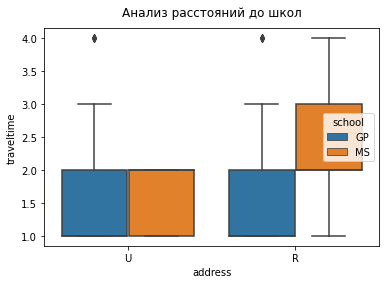

In [3]:
# посмотрим какое время затрачивают учащиеся до школ. Верю, что в будущем пригодится :)
sns.boxplot(x=math.address, y=math.traveltime, hue=math.school).set_title(
    'Анализ расстояний до школ', fontdict={'fontsize': 12}, pad=12)

,age,mother_edu,father_edu,traveltime,studytime,failures,"studytime, granular",family_rel,freetime,go_out,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
mother_edu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
father_edu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
family_rel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
go_out,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


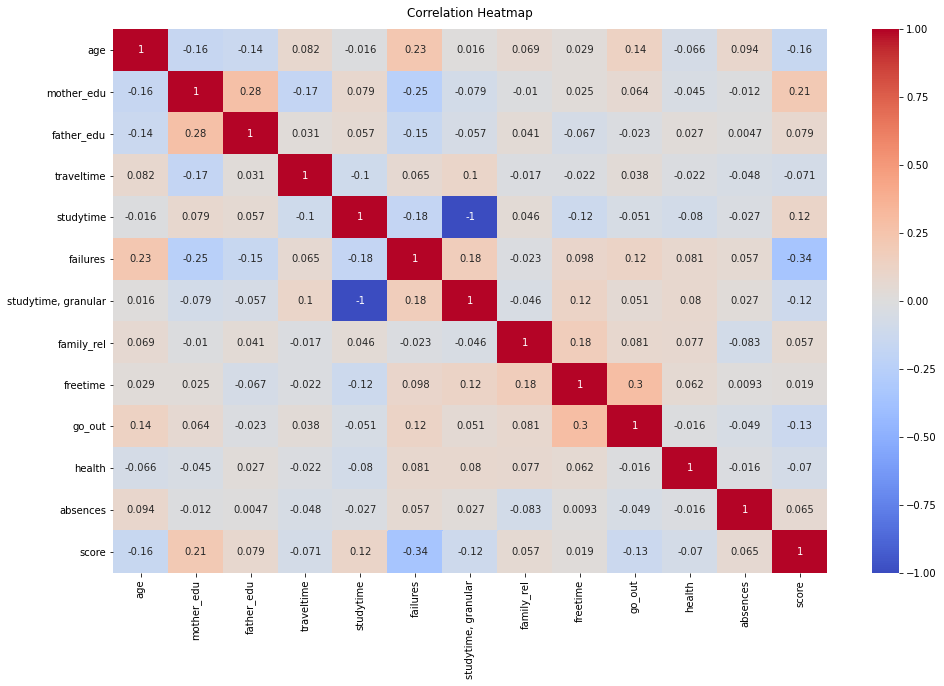

In [4]:
# смотрим матрицу корреляций:
display(math.corr())

# глаза разбегаются. Используем тепловую карту, чтобы визуально определить степени корреляции:
# указываем размер фигуры в дюймах, чтобы все значения влезли в квадратики
plt.figure(figsize=(16, 10))

# начертим тепловую карту
sns.heatmap(math.corr(), annot=True, cmap='coolwarm').set_title(
    'Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

# колонка studytime полностью коррелируется с колонкой studytime, granular(видим полную обратную зависимость)
# убираем избыточную колонку studytime, granular
math.drop(['studytime, granular'], inplace=True, axis=1)

In [5]:
# Анализ целевой переменной:
# смотрим пустые значения целевой переменной:
display(math[math.score.isna()])  # 6 значений
# видим, что 100 бальная система оценок, максимальная 100, минимальная 0, выбросов и аномалий нет
display(math.score.describe())
# удаляем строки с NaN в целевой переменной score в датафрейме, так как она может содержать только истинные метки
math = math.dropna(axis='index', how='any', subset=['score'])
math.reset_index(drop=True, inplace=True)

,school,sex,age,address,family_size,marital_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_sup,family_sup,paid,activities,nursery,higher,internet,romantic,family_rel,freetime,go_out,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

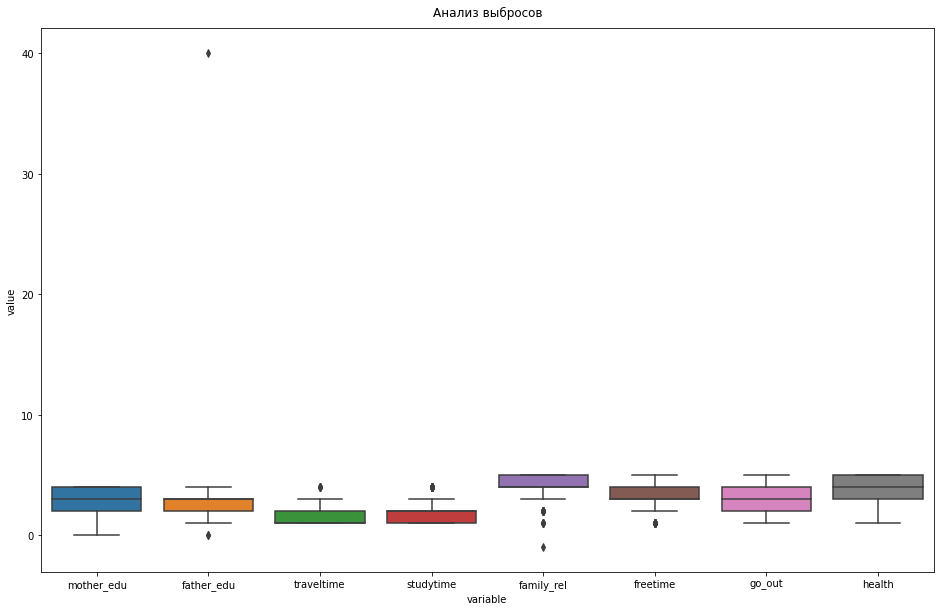

In [6]:
# Анализ номинативных переменных:
# строим графики, используя boxplot

plt.figure(figsize=(16, 10))
df = pd.DataFrame(data=math, columns=['mother_edu', 'father_edu', 'traveltime',
                                      'studytime', 'family_rel', 'freetime', 'go_out', 'health'])
# используем функцию melt (), которая разворачивает DataFrame из широкого формата в длинный
sns.boxplot(x="variable", y="value", data=pd.melt(df)).set_title(
    'Анализ выбросов', fontdict={'fontsize': 12}, pad=12)
plt.show()

In [7]:
# Анализируем графики, видим аномальные выбросы по колонкам Образование отца (>4) и Семейные отношения (<0):

# ищем выбивающиеся значения образования отца
# (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
print('Выбивающиеся значения - ячейка    число: ',
      math.father_edu[math.father_edu > 4])
# предполагаем, что 40 - это была 4, просто 0 появился
math.loc[11, 'father_edu'] = 4  # исправляем значение ячейки

# ищем выбивающиеся значения по семейным отношениям
# (от 1 - очень плохо до 5 - очень хорошо)
print('Выбивающиеся значения - ячейка    число: ',
      math.family_rel[math.family_rel < 0])
# предполагаем, что -1 - это была 1, просто знак минуса появился
math.loc[25, 'family_rel'] = 1  # исправляем значение ячейки

Выбивающиеся значения - ячейка    число:  11    40.0
Name: father_edu, dtype: float64
Выбивающиеся значения - ячейка    число:  25   -1.0
Name: family_rel, dtype: float64


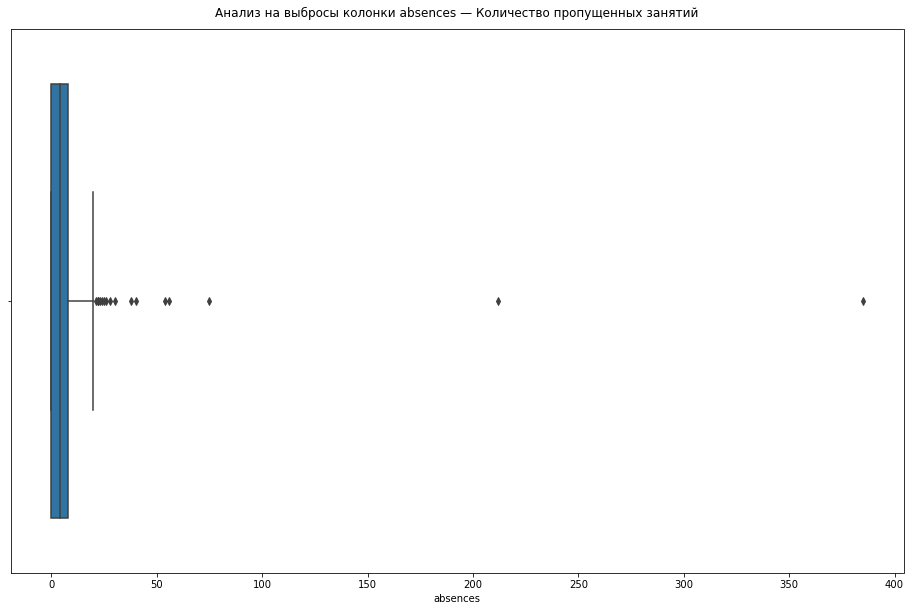

In [8]:
# у нас осталась еще одна неиследованная на выбросы колонка absences — Количество пропущенных занятий
plt.figure(figsize=(16, 10))
sns.boxplot(x=math.absences).set_title(
    'Анализ на выбросы колонки absences — Количество пропущенных занятий', fontdict={'fontsize': 12}, pad=12)
plt.show()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


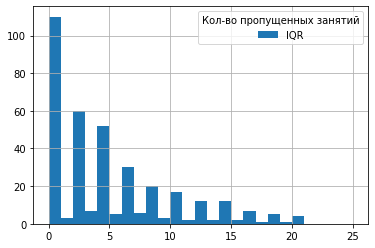

In [9]:
# Очень много выбросов. Посчитаем межвкартильный размах, 25-й перцентиль, 75-й перцентиль, границы выбросов
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

math.absences.loc[math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=25, range=(0, 25), label='IQR')  # нарисуем гистограмму

plt.legend().set_title('Кол-во пропущенных занятий')

In [10]:
# Посчитаем кол-во строк со значениями за границей выбросов:
# получаем 17 строк. Слишком много, чтобы просто выкинуть их.
print(len(math[(math.absences > 20) | (math.absences < -12)]),
      'строк со значениями за границей выбросов')
# Заменим значения, находящиеся за границей выбросов на значение медианы.
# Нижней границей выброса укажем значение 0, так как кол-во пропущенных занятий не может быть меньше 0
math.loc[(math.absences > 20) | (math.absences < 0),
         'absences'] = math.absences.median()

17 строк со значениями за границей выбросов


In [11]:
# выведем все колонки с неполными данными
nan_columns = math.columns[math.isna().any()]
for column in nan_columns:
    # смотрим кол-во недостающих значений в колонках в процентном соотношении
    display((math[column].isna()).value_counts(normalize=True, dropna=False))

False    0.96144
True     0.03856
Name: address, dtype: float64

False    0.930591
True     0.069409
Name: family_size, dtype: float64

False    0.884319
True     0.115681
Name: marital_status, dtype: float64

False    0.992288
True     0.007712
Name: mother_edu, dtype: float64

False    0.938303
True     0.061697
Name: father_edu, dtype: float64

False    0.951157
True     0.048843
Name: mother_job, dtype: float64

False    0.907455
True     0.092545
Name: father_job, dtype: float64

False    0.956298
True     0.043702
Name: reason, dtype: float64

False    0.920308
True     0.079692
Name: guardian, dtype: float64

False    0.928021
True     0.071979
Name: traveltime, dtype: float64

False    0.982005
True     0.017995
Name: studytime, dtype: float64

False    0.943445
True     0.056555
Name: failures, dtype: float64

False    0.976864
True     0.023136
Name: school_sup, dtype: float64

False    0.902314
True     0.097686
Name: family_sup, dtype: float64

False    0.899743
True     0.100257
Name: paid, dtype: float64

False    0.96401
True     0.03599
Name: activities, dtype: float64

False    0.96144
True     0.03856
Name: nursery, dtype: float64

False    0.948586
True     0.051414
Name: higher, dtype: float64

False    0.912596
True     0.087404
Name: internet, dtype: float64

False    0.920308
True     0.079692
Name: romantic, dtype: float64

False    0.930591
True     0.069409
Name: family_rel, dtype: float64

False    0.976864
True     0.023136
Name: freetime, dtype: float64

False    0.982005
True     0.017995
Name: go_out, dtype: float64

False    0.96144
True     0.03856
Name: health, dtype: float64

False    0.971722
True     0.028278
Name: absences, dtype: float64

In [12]:
# создадим функцию, которая будет вычислять моду в колонке и заменять недостающие значения на наиболее часто встречающиеся.
# Используем моду, так как практически все переменные качественные и значения потерянных данных не больше 12%
# (количественная только одна - absences - кол-во пропущенных занятий, но и ее пропущенные значения лучше поменять на моду)
def fill_by_mode(df, column):
    mode = df[column].mode(dropna=False)[0]
    return df[column].fillna(mode)


for column in nan_columns:
    # применим функцию и заменим все недостающие значения на моду
    math.loc[:, column] = fill_by_mode(math, column)

In [13]:
math.info()  # вглянем еще раз на датафрейм. Видим, что недостающих значений не осталось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          389 non-null    object 
 1   sex             389 non-null    object 
 2   age             389 non-null    int64  
 3   address         389 non-null    object 
 4   family_size     389 non-null    object 
 5   marital_status  389 non-null    object 
 6   mother_edu      389 non-null    float64
 7   father_edu      389 non-null    float64
 8   mother_job      389 non-null    object 
 9   father_job      389 non-null    object 
 10  reason          389 non-null    object 
 11  guardian        389 non-null    object 
 12  traveltime      389 non-null    float64
 13  studytime       389 non-null    float64
 14  failures        389 non-null    float64
 15  school_sup      389 non-null    object 
 16  family_sup      389 non-null    object 
 17  paid            389 non-null    obj

In [14]:
# создадим функцию, которая будет разбивать переменные в колонке на дискретные интервалы
def set_bins(column, number_intervals):
    c = math[column].value_counts(bins=number_intervals)
    i = 0
    for i in range(number_intervals):
        math.loc[(math[column] > c.index[i].left) & (
            math[column] <= c.index[i].right), column] = i
        i += 1

In [15]:
# возраста разделим на 4 равных интервала и назначим им переменные от 0 до 3,
# где 0 - учащиеся от 15 до 16 лет, 1 - от 16 до 18, 2 - от 18 до 20, 3 - от 20 до 22
set_bins('age', 4)

# все пропуски занятий разделим на 4 равных интервала и назначим им переменные от 0 до 3,
# где 0 - кол-во пропущенных занятий от 0 до 5, 1 - от 5 до 10, 2 - от 10 до 15, 3 - от 15 до 20
set_bins('absences', 4)

# переконвертируем столбец в float для наглядности, так как теперь возраст - это не какое-то определенное значение, а интервал
math.age = math.age.astype(int).astype(float)

In [16]:
# создадим функцию, для отрисовки графиков boxplot с цифровыми значениями медиан на графиках для наглядности
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    box_plot = sns.boxplot(x=column, y='score', data=math.loc[math.loc[:, column].isin(
        math.loc[:, column])], ax=ax)
    ax = box_plot.axes
    lines = ax.get_lines()
    categories = ax.get_xticks()
    for cat in categories:
        y = round(lines[4+cat*6].get_ydata()[0], 1)
        ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold',
                size=10, color='white', bbox=dict(facecolor='#445A64'))
    box_plot.figure.tight_layout()
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [17]:
get_boxplot

<function __main__.get_boxplot(column)>

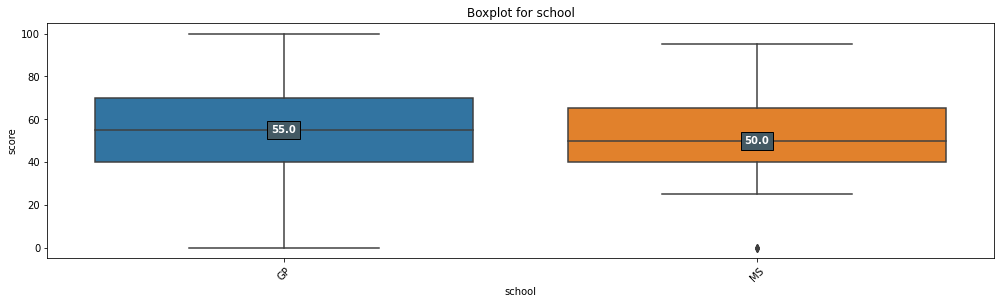

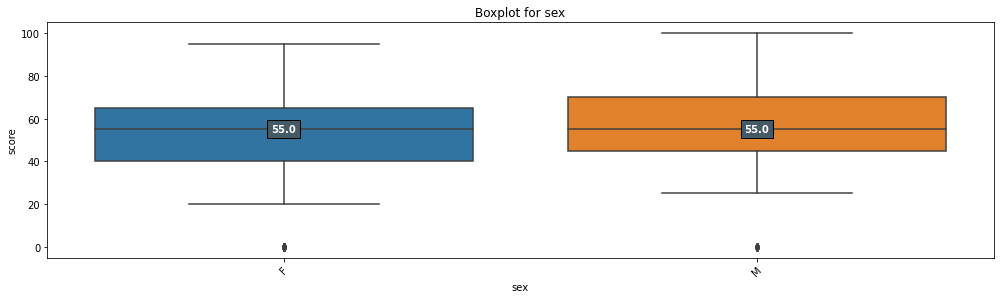

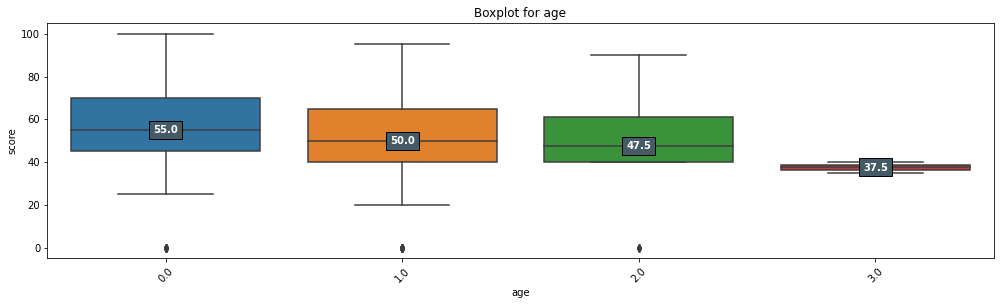

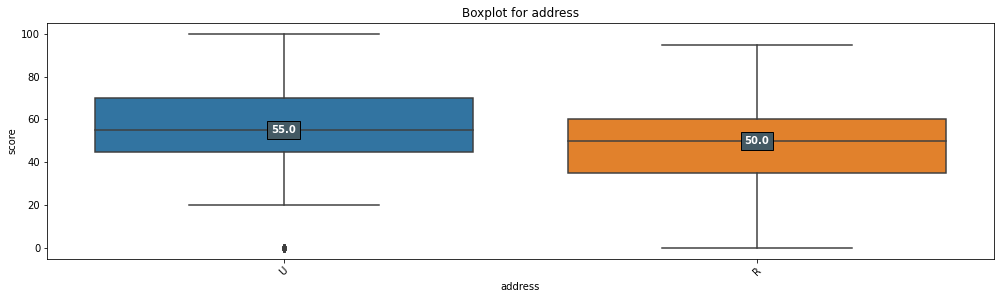

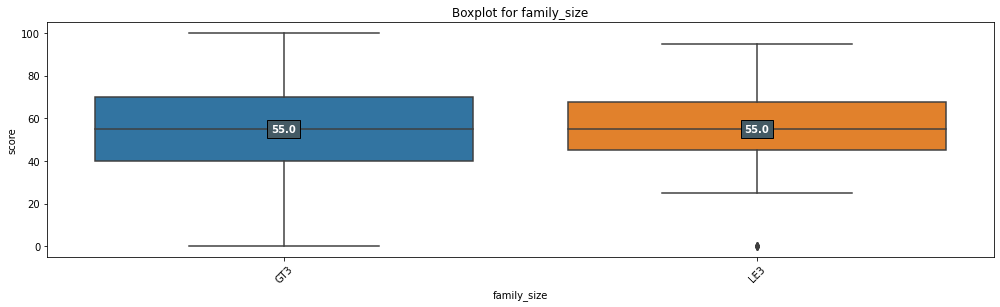

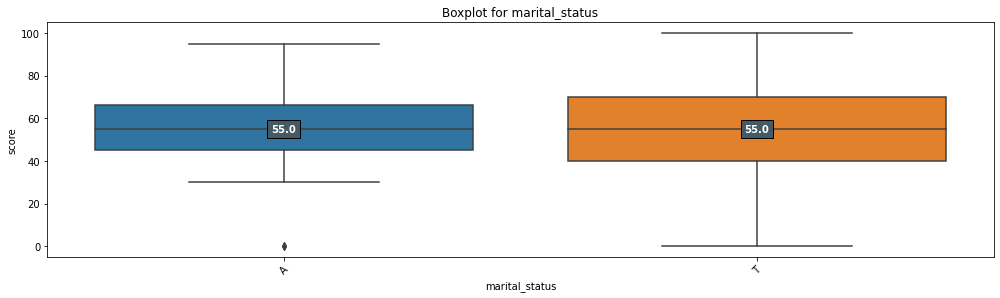

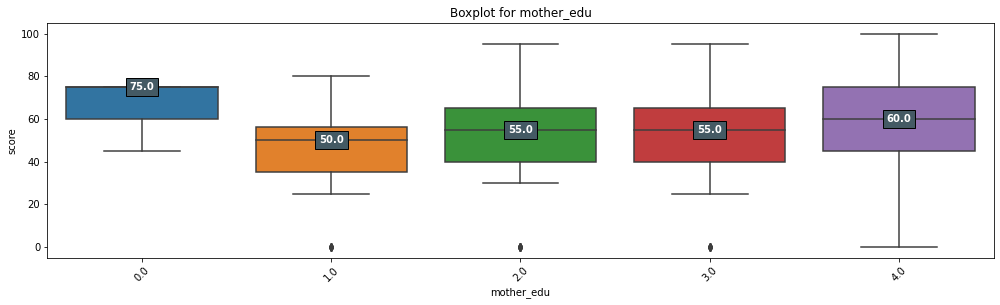

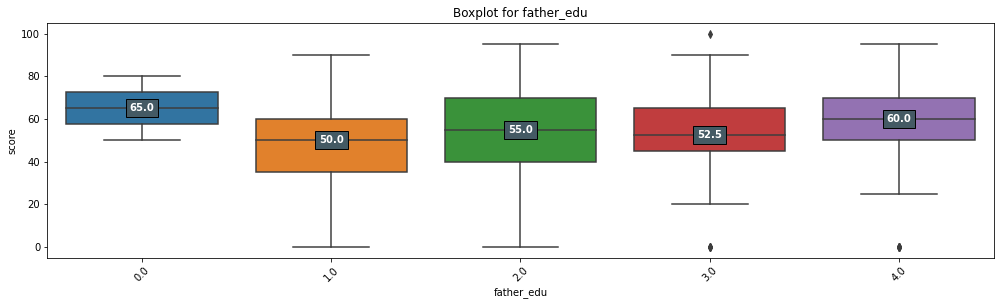

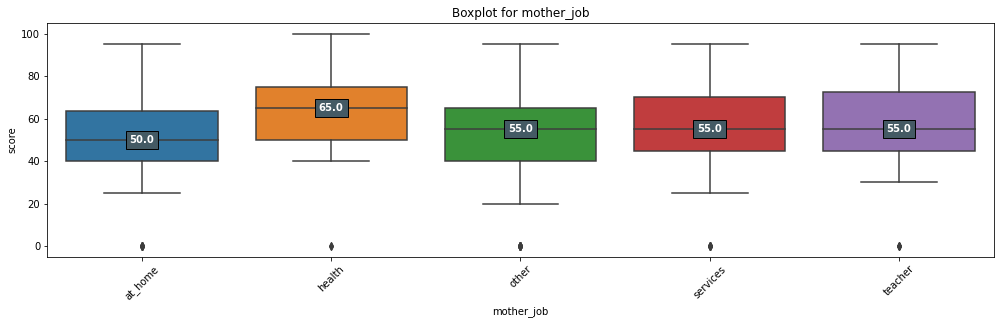

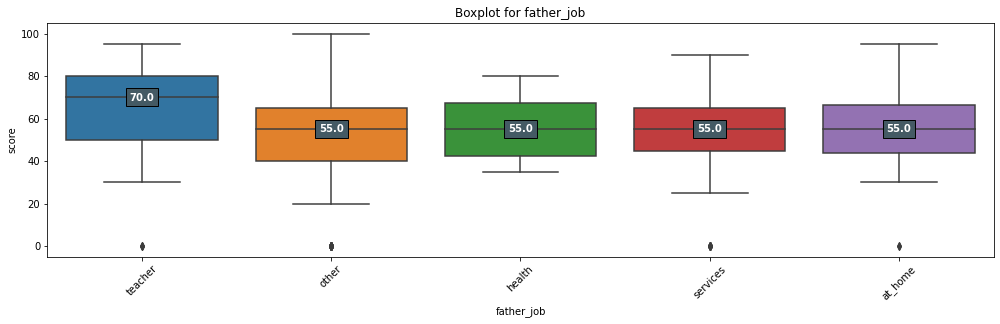

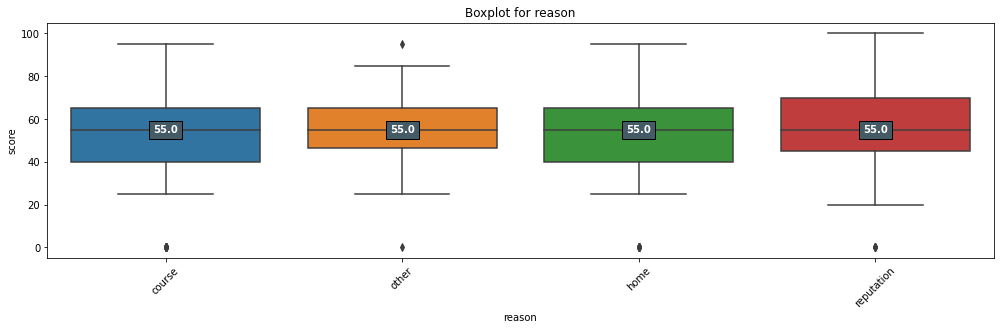

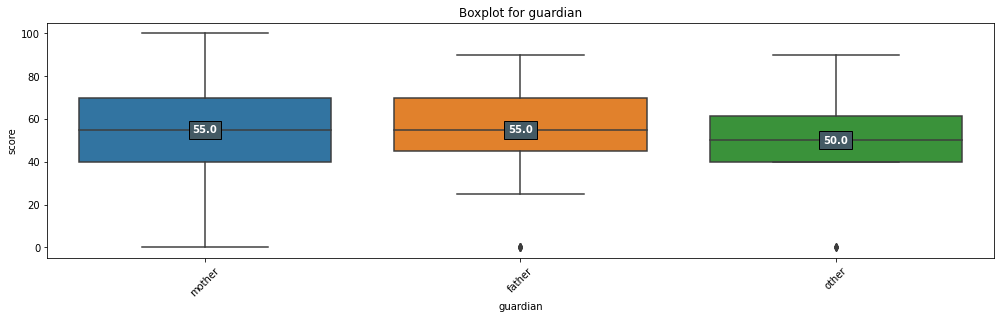

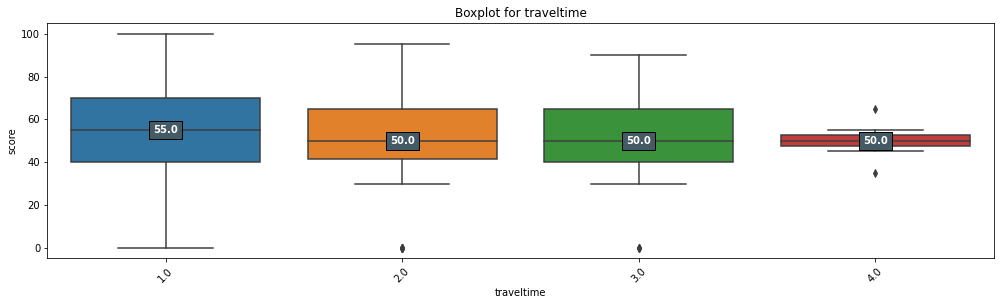

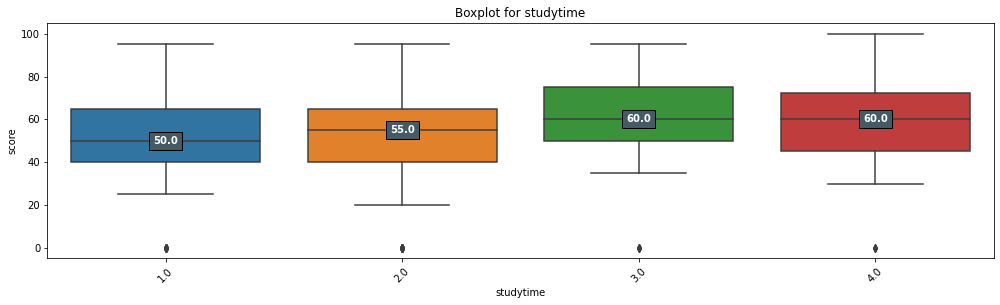

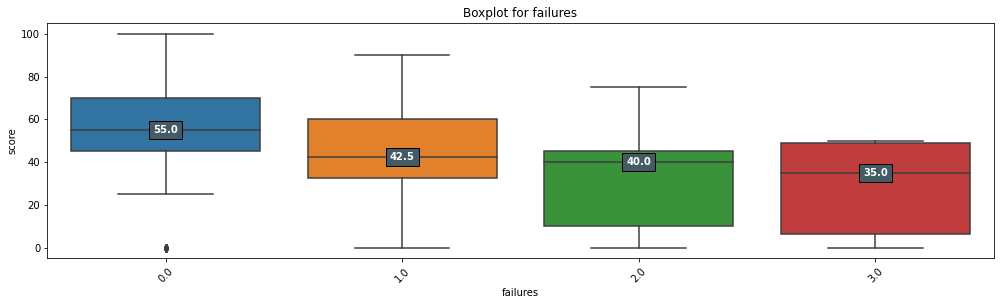

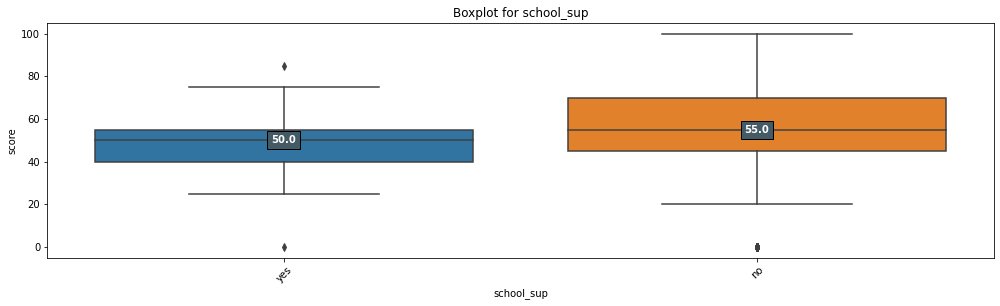

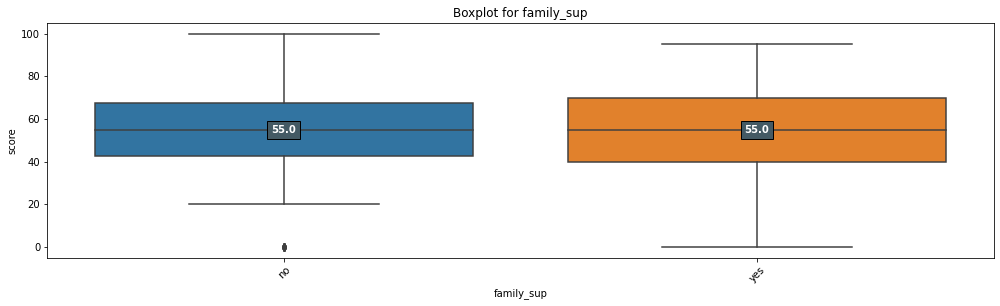

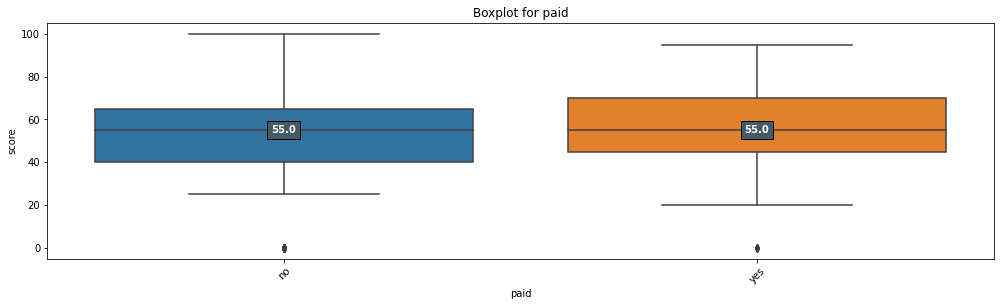

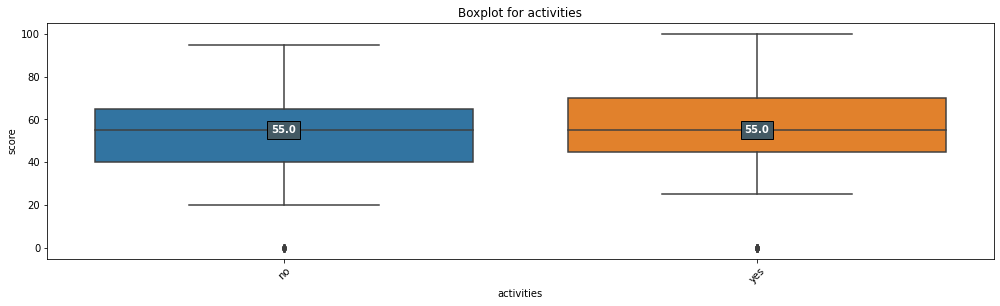

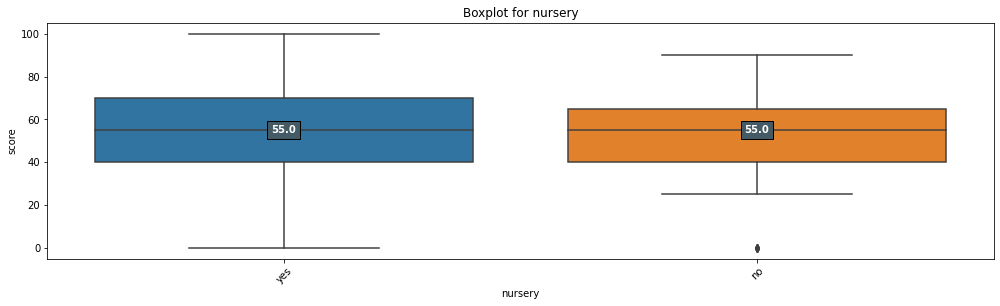

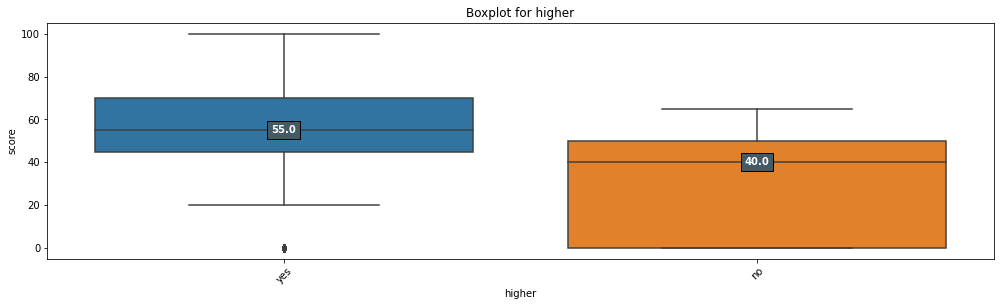

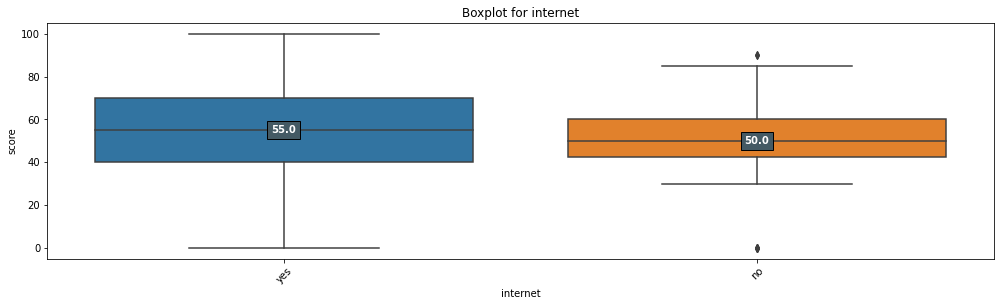

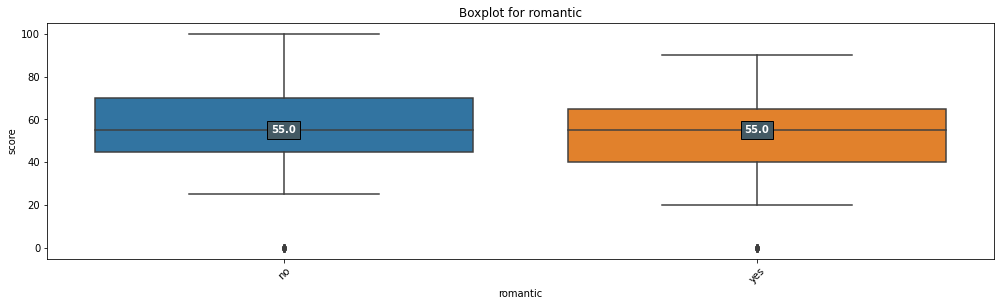

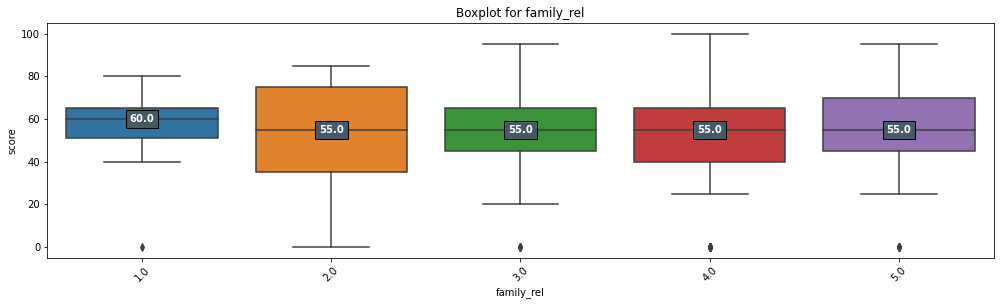

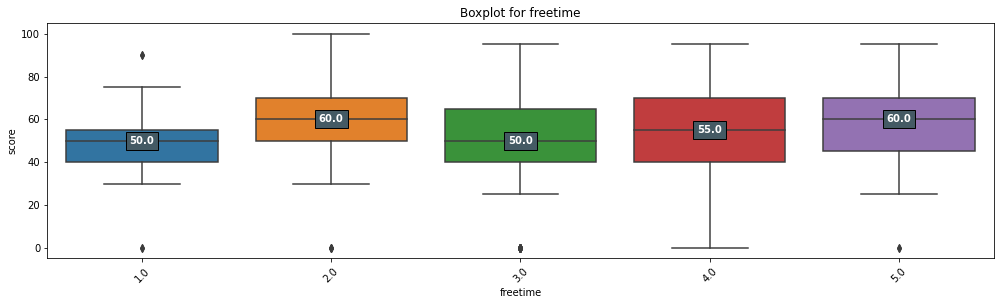

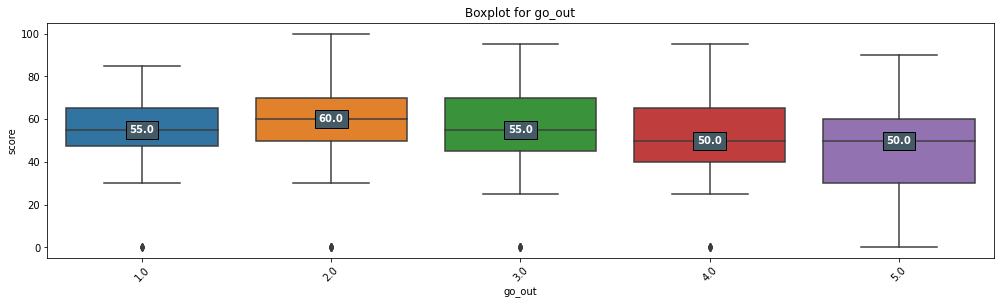

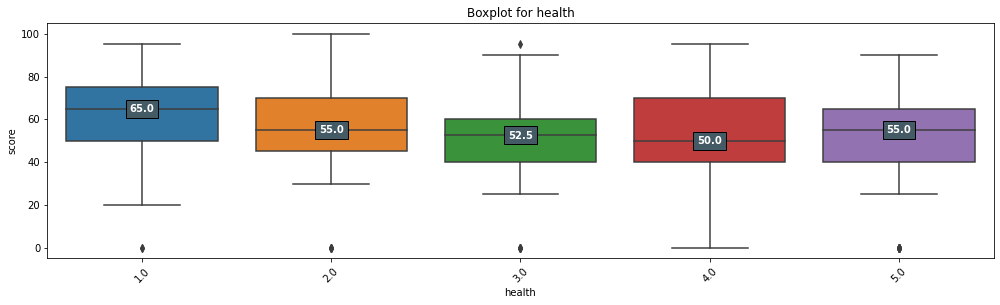

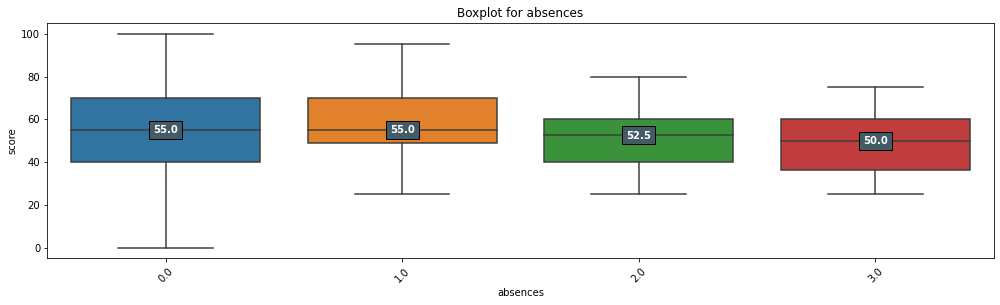

In [18]:
# выведем графики для последующего анализа значимости признаков
for column in math.columns[:-1]:
    get_boxplot(column)

 <h2><p style="text-align: center;"> Промежуточные итоги: </p> </h2>
 
    После анализа графиков по медиане остаются следующие колонки:
    
 'school', <br>
 'age', <br>
 'address', <br>
 'mother_edu', <br>
 'father_edu', <br>
 'mother_job', <br>
 'father_job', <br>
 'guardian', <br>
 'traveltime', <br>
 'studytime', <br>
 'failures', <br>
 'school_sup', <br>
 'higher', <br>
 'internet', <br>
 'family_rel', <br>
 'freetime', <br>
 'go_out', <br>
 'health', <br>
 'absences' <br>
  
  
    Из них по графикам мы видим корреляцию с баллами, получаемыми учащимися по колонкам:
 'age' - возраст учащихся - чем старше становится ученик, тем меньше баллов <br>
 'failures' - количество внеучебных неудач - чем больше неудач, тем меньше баллов <br>
 'absences' — количество пропущенных занятий - чем больше пропущенных занятий, тем меньше баллов  <br>
 
    оставим эти колонки для нашей модели, будем считать их репрезентативными
    
 Но колонок осталось еще очень много, давайте анализировать дальше: <br>

In [19]:
sorted_columns = ['school', 'age', 'address', 'mother_edu', 'father_edu', 'mother_job', 'father_job', 'guardian', 'traveltime',
                  'studytime', 'failures', 'school_sup', 'higher', 'internet', 'family_rel', 'freetime', 'go_out', 'health', 'absences', 'score']
for column in sorted_columns:
    # создадим промежуточный датафрейм
    math_intermediate = math.loc[:, sorted_columns]

math_intermediate.info()  # из 30 колонок осталось 20, тоже неплохо, но надо идти дальше

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   age         389 non-null    float64
 2   address     389 non-null    object 
 3   mother_edu  389 non-null    float64
 4   father_edu  389 non-null    float64
 5   mother_job  389 non-null    object 
 6   father_job  389 non-null    object 
 7   guardian    389 non-null    object 
 8   traveltime  389 non-null    float64
 9   studytime   389 non-null    float64
 10  failures    389 non-null    float64
 11  school_sup  389 non-null    object 
 12  higher      389 non-null    object 
 13  internet    389 non-null    object 
 14  family_rel  389 non-null    float64
 15  freetime    389 non-null    float64
 16  go_out      389 non-null    float64
 17  health      389 non-null    float64
 18  absences    389 non-null    float64
 19  score       389 non-null    f

In [20]:
# создадим функцию расчета t-критерия Стьюдента для 2 независимых выборок
# проверяется нулевая гипотеза, что переменные во всех колонках имеют имеют идентичные средние
# (ожидаемые) отклонения от целевой переменной score

def get_stat_dif(column):
    cols = math.loc[:, column].value_counts(sort=False).index[:].sort_values()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'],
                     math.loc[math.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [21]:
for column in math.columns[:-1]:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


    Как мы видим, серьёзно отличаются восемь параметров, включая предположенное нами количество внеучебных неудач : 
address, mother_edu, mother_job, failures, higher, romantic. Оставим эти переменные в датасете для дальнейшего построения модели. <br>
Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на успеваемость по математике, это: <br>
<h5><p style="text-align: center;"> age, address, mother_edu, mother_job, failures, higher, romantic, absences,score </p> </h5>

In [22]:
math_for_model = math.loc[:, ['age', 'address', 'mother_edu', 'mother_job', 'failures', 'higher', 'romantic', 'absences','score']]
math_for_model.head()

,age,address,mother_edu,mother_job,failures,higher,romantic,absences,score
0,1.0,U,4.0,at_home,0.0,yes,no,1.0,30.0
1,1.0,U,1.0,at_home,0.0,yes,no,0.0,30.0
2,0.0,U,1.0,at_home,3.0,yes,no,1.0,50.0
3,0.0,U,4.0,health,0.0,yes,yes,0.0,75.0
4,0.0,U,3.0,other,0.0,yes,no,0.0,50.0


<h2><p style="text-align: center;"> Выводы </p> </h2>
В данных достаточно мало пустых значений, только столбец Семейное положение был заполнен на 88% <br>

Большое кол-во выбросов найдены только в столбце Количества пропущенных занятий, что позволяет сделать вывод о том, что данные достаточно чистые. <br>

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, address, mother_edu, mother_job, failures, higher, romantic, absences, score. <br>

Общий итог - кол-во внеучебных неудач сильно влияют на оценки, чем больше неудач, тем хуже оценки. Так же выяснили, что пол никак не влияет на способность к математике, однако с возрастом учащиеся начинают учиться хуже. Те, кто хочет поступить в дальнейшем в университет, те более мотивированы учиться лучше, поэтому у них оценки выше. Учащиеся находящиеся в романтических отношениях учатся в среднем чуть хуже, чем одинокие. Некоторое превосходство имеют жители города, но это обьясняется просто - в выборке всего 2 школы и до обеих школ быстрее добраться тем, кто живет в городе (помните самый первый график? :)).
Образование и место работы матери имеют значения, так как в неполных семьях учащиеся больше воспитываются под опекой матери (но это не точно :)).